In [22]:
import pandas as pd
import numpy as np
from datetime import timedelta

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

import sys
import os
from joblib import Memory
import joblib

from backtest import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
DATA_PATH = '/Users/austingalm/Documents/GitHub/fpi_project_lab_autumn2024/data/'
CLASSIFIER_DATA_PATH = DATA_PATH + 'classifier_full/'
ANALYSIS_PATH = '/Users/austingalm/Documents/GitHub/fpi_project_lab_autumn2024/analysis/'

In [24]:
MIN_SAMPLES_SPLIT_LIST = [2,10, 30, 50, 100, 200, 300, 700, 1000]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
MAX_DEPTH_LIST = [2, 4, 8, 16, 32, 64, None]
N_ESTIMATORS_LIST = [10,50,100,500]
PCA_N_COMPONENTS_LIST = [0.9, 0.95, 0.975]
CLASS_WEIGHT_LIST = ['balanced_subsample', 'balanced', None]

# Broad Assets Universe

In [25]:
UNIVERSE = 'broad_asset'
ASSETS = ['Asset ' + str(i) for i in range(1, 12)]

def assets_file_str_func(universe, assets):
    asset_nums = [asset.split(' ',1)[1] for asset in assets]
    return [universe + f'_{num}_' + 'features' for num in asset_nums]

In [29]:
backtest = Backtest(model=RandomForestClassifier(), base_per='2004-04-20', update_freq=26)

In [30]:
backtest.read_returns(data_path=DATA_PATH, universe_returns='broad_assets_weekly_rets')
backtest.compute_lookbacks()
# backtest.read_features(data_path=CLASSIFIER_DATA_PATH, features=FEATURES)
backtest.read_data(data_path=DATA_PATH, assets=ASSETS, universe=UNIVERSE, file_str_func=assets_file_str_func)

In [13]:
param_grid = {'pca__n_components': PCA_N_COMPONENTS_LIST,
              'classifier__n_estimators': N_ESTIMATORS_LIST, 
              'classifier__min_samples_split': MIN_SAMPLES_SPLIT_LIST, 
              'classifier__max_depth': MAX_DEPTH_LIST,
              'classifier__class_weight': CLASS_WEIGHT_LIST}
backtest.record_strat_rets(assets=ASSETS, param_grid=param_grid)

(PoolActor pid=16717) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(PoolActor pid=16717)   return fit_method(estimator, *args, **kwargs)
(PoolActor pid=16712) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 34x across cluster]
(PoolActor pid=16712)   return fit_method(estimator, *args, **kwargs) [repeated 34x across cluster]


Completed predictions for period 1 of 40


(PoolActor pid=16783) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 16x across cluster]
(PoolActor pid=16783)   return fit_method(estimator, *args, **kwargs) [repeated 16x across cluster]
(PoolActor pid=16786) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 36x across cluster]
(PoolActor pid=16786)   return fit_method(estimator, *args, **kwargs) [repeated 36x across cluster]


Completed predictions for period 2 of 40


(PoolActor pid=16868) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 14x across cluster]
(PoolActor pid=16868)   return fit_method(estimator, *args, **kwargs) [repeated 14x across cluster]
(PoolActor pid=16871) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 32x across cluster]
(PoolActor pid=16871)   return fit_method(estimator, *args, **kwargs) [repeated 32x across cluster]
(PoolActor pid=16867) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 1

Completed predictions for period 3 of 40


(PoolActor pid=16948) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(PoolActor pid=16948)   return fit_method(estimator, *args, **kwargs)
(PoolActor pid=16946) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(PoolActor pid=16946)   return fit_method(estimator, *args, **kwargs)
(PoolActor pid=16946) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 18x across cluster]
(PoolActor pid=16946)   return fit_method(estimator, *args, **kwargs) [repeated 18x across cluster]
(

Completed predictions for period 4 of 40


(PoolActor pid=17012) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 2x across cluster]
(PoolActor pid=17012)   return fit_method(estimator, *args, **kwargs) [repeated 2x across cluster]
(PoolActor pid=17011) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 28x across cluster]
(PoolActor pid=17011)   return fit_method(estimator, *args, **kwargs) [repeated 28x across cluster]
(PoolActor pid=17008) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 18x

Completed predictions for period 5 of 40


(PoolActor pid=17086) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 4x across cluster]
(PoolActor pid=17086)   return fit_method(estimator, *args, **kwargs) [repeated 4x across cluster]
(PoolActor pid=17085) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 20x across cluster]
(PoolActor pid=17085)   return fit_method(estimator, *args, **kwargs) [repeated 20x across cluster]
(PoolActor pid=17084) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 28x

Completed predictions for period 6 of 40


(PoolActor pid=17153) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 2x across cluster]
(PoolActor pid=17153)   return fit_method(estimator, *args, **kwargs) [repeated 2x across cluster]
(PoolActor pid=17152) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 19x across cluster]
(PoolActor pid=17152)   return fit_method(estimator, *args, **kwargs) [repeated 19x across cluster]
(PoolActor pid=17147) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 27x

Completed predictions for period 7 of 40


(PoolActor pid=17212) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 2x across cluster]
(PoolActor pid=17212)   return fit_method(estimator, *args, **kwargs) [repeated 2x across cluster]
(PoolActor pid=17215) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 42x across cluster]
(PoolActor pid=17215)   return fit_method(estimator, *args, **kwargs) [repeated 42x across cluster]


Completed predictions for period 8 of 40


(PoolActor pid=17281) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 8x across cluster]
(PoolActor pid=17281)   return fit_method(estimator, *args, **kwargs) [repeated 8x across cluster]
(PoolActor pid=17283) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 23x across cluster]
(PoolActor pid=17283)   return fit_method(estimator, *args, **kwargs) [repeated 23x across cluster]
(PoolActor pid=17282) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 8x 

Completed predictions for period 9 of 40


(PoolActor pid=17348) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 4x across cluster]
(PoolActor pid=17348)   return fit_method(estimator, *args, **kwargs) [repeated 4x across cluster]
(PoolActor pid=17351) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 11x across cluster]
(PoolActor pid=17351)   return fit_method(estimator, *args, **kwargs) [repeated 11x across cluster]
(PoolActor pid=17348) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 17x

Completed predictions for period 10 of 40


(PoolActor pid=17417) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(PoolActor pid=17417)   return fit_method(estimator, *args, **kwargs)
(PoolActor pid=17420) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(PoolActor pid=17420)   return fit_method(estimator, *args, **kwargs)
(PoolActor pid=17414) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 12x across cluster]
(PoolActor pid=17414)   return fit_method(estimator, *args, **kwargs) [repeated 12x across cluster]
(

Completed predictions for period 11 of 40


(PoolActor pid=17493) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 2x across cluster]
(PoolActor pid=17493)   return fit_method(estimator, *args, **kwargs) [repeated 2x across cluster]
(PoolActor pid=17486) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 31x across cluster]
(PoolActor pid=17486)   return fit_method(estimator, *args, **kwargs) [repeated 31x across cluster]


Completed predictions for period 12 of 40


(PoolActor pid=17558) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 19x across cluster]
(PoolActor pid=17558)   return fit_method(estimator, *args, **kwargs) [repeated 19x across cluster]
(PoolActor pid=17555) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 43x across cluster]
(PoolActor pid=17555)   return fit_method(estimator, *args, **kwargs) [repeated 43x across cluster]


Completed predictions for period 13 of 40


(PoolActor pid=17626) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 7x across cluster]
(PoolActor pid=17626)   return fit_method(estimator, *args, **kwargs) [repeated 7x across cluster]
(PoolActor pid=17626) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 21x across cluster]
(PoolActor pid=17626)   return fit_method(estimator, *args, **kwargs) [repeated 21x across cluster]
(PoolActor pid=17629) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 12x

Completed predictions for period 14 of 40


(PoolActor pid=17696) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 9x across cluster]
(PoolActor pid=17696)   return fit_method(estimator, *args, **kwargs) [repeated 9x across cluster]
(PoolActor pid=17690) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 16x across cluster]
(PoolActor pid=17690)   return fit_method(estimator, *args, **kwargs) [repeated 16x across cluster]
(PoolActor pid=17692) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 12x

Completed predictions for period 15 of 40


(PoolActor pid=17756) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 4x across cluster]
(PoolActor pid=17756)   return fit_method(estimator, *args, **kwargs) [repeated 4x across cluster]
(PoolActor pid=17762) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 13x across cluster]
(PoolActor pid=17762)   return fit_method(estimator, *args, **kwargs) [repeated 13x across cluster]
(PoolActor pid=17762) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 3x 

Completed predictions for period 16 of 40


(PoolActor pid=17846) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 3x across cluster]
(PoolActor pid=17846)   return fit_method(estimator, *args, **kwargs) [repeated 3x across cluster]
(PoolActor pid=17841) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 13x across cluster]
(PoolActor pid=17841)   return fit_method(estimator, *args, **kwargs) [repeated 13x across cluster]
(PoolActor pid=17840) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 8x 

Completed predictions for period 17 of 40


(PoolActor pid=17911) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 2x across cluster]
(PoolActor pid=17911)   return fit_method(estimator, *args, **kwargs) [repeated 2x across cluster]
(PoolActor pid=17907) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 22x across cluster]
(PoolActor pid=17907)   return fit_method(estimator, *args, **kwargs) [repeated 22x across cluster]
(PoolActor pid=17910) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 11x

Completed predictions for period 18 of 40


(PoolActor pid=17996) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 3x across cluster]
(PoolActor pid=17996)   return fit_method(estimator, *args, **kwargs) [repeated 3x across cluster]
(PoolActor pid=17993) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 11x across cluster]
(PoolActor pid=17993)   return fit_method(estimator, *args, **kwargs) [repeated 11x across cluster]
(PoolActor pid=17996) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 9x 

Completed predictions for period 19 of 40


(PoolActor pid=18056) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 3x across cluster]
(PoolActor pid=18056)   return fit_method(estimator, *args, **kwargs) [repeated 3x across cluster]
(PoolActor pid=18056) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 8x across cluster]
(PoolActor pid=18056)   return fit_method(estimator, *args, **kwargs) [repeated 8x across cluster]
(PoolActor pid=18061) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 3x ac

Completed predictions for period 20 of 40


(PoolActor pid=18129) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 2x across cluster]
(PoolActor pid=18129)   return fit_method(estimator, *args, **kwargs) [repeated 2x across cluster]
(PoolActor pid=18129) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 18x across cluster]
(PoolActor pid=18129)   return fit_method(estimator, *args, **kwargs) [repeated 18x across cluster]
(PoolActor pid=18130) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 9x 

Completed predictions for period 21 of 40


(PoolActor pid=18208) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 6x across cluster]
(PoolActor pid=18208)   return fit_method(estimator, *args, **kwargs) [repeated 6x across cluster]
(PoolActor pid=18205) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 29x across cluster]
(PoolActor pid=18205)   return fit_method(estimator, *args, **kwargs) [repeated 29x across cluster]
(PoolActor pid=18209) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 4x 

Completed predictions for period 22 of 40


(PoolActor pid=18275) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 3x across cluster]
(PoolActor pid=18275)   return fit_method(estimator, *args, **kwargs) [repeated 3x across cluster]
(PoolActor pid=18279) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 11x across cluster]
(PoolActor pid=18279)   return fit_method(estimator, *args, **kwargs) [repeated 11x across cluster]
(PoolActor pid=18275) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 8x 

Completed predictions for period 23 of 40


(PoolActor pid=18358) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 4x across cluster]
(PoolActor pid=18358)   return fit_method(estimator, *args, **kwargs) [repeated 4x across cluster]
(PoolActor pid=18360) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 12x across cluster]
(PoolActor pid=18360)   return fit_method(estimator, *args, **kwargs) [repeated 12x across cluster]
(PoolActor pid=18364) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 2x 

Completed predictions for period 24 of 40


(PoolActor pid=18428) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(PoolActor pid=18428)   return fit_method(estimator, *args, **kwargs)
(PoolActor pid=18431) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(PoolActor pid=18431)   return fit_method(estimator, *args, **kwargs)
(PoolActor pid=18434) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 7x across cluster]
(PoolActor pid=18434)   return fit_method(estimator, *args, **kwargs) [repeated 7x across cluster]
(Po

Completed predictions for period 25 of 40


(PoolActor pid=18521) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 5x across cluster]
(PoolActor pid=18521)   return fit_method(estimator, *args, **kwargs) [repeated 5x across cluster]
(PoolActor pid=18525) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 18x across cluster]
(PoolActor pid=18525)   return fit_method(estimator, *args, **kwargs) [repeated 18x across cluster]
(PoolActor pid=18526) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 6x 

Completed predictions for period 26 of 40


(PoolActor pid=18585) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 6x across cluster]
(PoolActor pid=18585)   return fit_method(estimator, *args, **kwargs) [repeated 6x across cluster]
(PoolActor pid=18586) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 21x across cluster]
(PoolActor pid=18586)   return fit_method(estimator, *args, **kwargs) [repeated 21x across cluster]
(PoolActor pid=18586) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 11x

Completed predictions for period 27 of 40


(PoolActor pid=18659) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 4x across cluster]
(PoolActor pid=18659)   return fit_method(estimator, *args, **kwargs) [repeated 4x across cluster]
(PoolActor pid=18661) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 20x across cluster]
(PoolActor pid=18661)   return fit_method(estimator, *args, **kwargs) [repeated 20x across cluster]
(PoolActor pid=18655) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 6x 

Completed predictions for period 28 of 40


(PoolActor pid=18734) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 3x across cluster]
(PoolActor pid=18734)   return fit_method(estimator, *args, **kwargs) [repeated 3x across cluster]
(PoolActor pid=18734) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 13x across cluster]
(PoolActor pid=18734)   return fit_method(estimator, *args, **kwargs) [repeated 13x across cluster]
(PoolActor pid=18733) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 20x

Completed predictions for period 29 of 40


(PoolActor pid=18806) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 2x across cluster]
(PoolActor pid=18806)   return fit_method(estimator, *args, **kwargs) [repeated 2x across cluster]
(PoolActor pid=18807) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 18x across cluster]
(PoolActor pid=18807)   return fit_method(estimator, *args, **kwargs) [repeated 18x across cluster]
(PoolActor pid=18803) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 10x

Completed predictions for period 30 of 40


(PoolActor pid=18870) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(PoolActor pid=18870)   return fit_method(estimator, *args, **kwargs)
(PoolActor pid=18871) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(PoolActor pid=18871)   return fit_method(estimator, *args, **kwargs)
(PoolActor pid=18870) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 11x across cluster]
(PoolActor pid=18870)   return fit_method(estimator, *args, **kwargs) [repeated 11x across cluster]
(

Completed predictions for period 31 of 40


(PoolActor pid=18957) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 4x across cluster]
(PoolActor pid=18957)   return fit_method(estimator, *args, **kwargs) [repeated 4x across cluster]
(PoolActor pid=18956) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 13x across cluster]
(PoolActor pid=18956)   return fit_method(estimator, *args, **kwargs) [repeated 13x across cluster]
(PoolActor pid=18955) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 3x 

Completed predictions for period 32 of 40


(PoolActor pid=19031) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(PoolActor pid=19031)   return fit_method(estimator, *args, **kwargs)
(PoolActor pid=19030) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(PoolActor pid=19030)   return fit_method(estimator, *args, **kwargs)
(PoolActor pid=19036) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 13x across cluster]
(PoolActor pid=19036)   return fit_method(estimator, *args, **kwargs) [repeated 13x across cluster]
(

Completed predictions for period 33 of 40


(PoolActor pid=19120) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(PoolActor pid=19120)   return fit_method(estimator, *args, **kwargs)
(PoolActor pid=19117) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 13x across cluster]
(PoolActor pid=19117)   return fit_method(estimator, *args, **kwargs) [repeated 13x across cluster]
(PoolActor pid=19118) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 6x across cluster]
(PoolActor pid=19118)   return fit_method(

Completed predictions for period 34 of 40


(PoolActor pid=19187) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(PoolActor pid=19187)   return fit_method(estimator, *args, **kwargs)
(PoolActor pid=19192) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(PoolActor pid=19192)   return fit_method(estimator, *args, **kwargs)
(PoolActor pid=19188) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 7x across cluster]
(PoolActor pid=19188)   return fit_method(estimator, *args, **kwargs) [repeated 7x across cluster]
(Po

Completed predictions for period 35 of 40


(PoolActor pid=19260) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(PoolActor pid=19260)   return fit_method(estimator, *args, **kwargs)
(PoolActor pid=19257) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(PoolActor pid=19257)   return fit_method(estimator, *args, **kwargs)
(PoolActor pid=19261) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 17x across cluster]
(PoolActor pid=19261)   return fit_method(estimator, *args, **kwargs) [repeated 17x across cluster]
(

Completed predictions for period 36 of 40


(PoolActor pid=19347) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 2x across cluster]
(PoolActor pid=19347)   return fit_method(estimator, *args, **kwargs) [repeated 2x across cluster]
(PoolActor pid=19351) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 8x across cluster]
(PoolActor pid=19351)   return fit_method(estimator, *args, **kwargs) [repeated 8x across cluster]
(PoolActor pid=19347) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 3x ac

Completed predictions for period 37 of 40


(PoolActor pid=19461) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(PoolActor pid=19461)   return fit_method(estimator, *args, **kwargs)
(PoolActor pid=19457) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(PoolActor pid=19457)   return fit_method(estimator, *args, **kwargs)
(PoolActor pid=19459) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 12x across cluster]
(PoolActor pid=19459)   return fit_method(estimator, *args, **kwargs) [repeated 12x across cluster]
(

Completed predictions for period 38 of 40


(PoolActor pid=19553) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 5x across cluster]
(PoolActor pid=19553)   return fit_method(estimator, *args, **kwargs) [repeated 5x across cluster]
(PoolActor pid=19559) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 11x across cluster]
(PoolActor pid=19559)   return fit_method(estimator, *args, **kwargs) [repeated 11x across cluster]
(PoolActor pid=19554) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 16x

Completed predictions for period 39 of 40


(PoolActor pid=19629) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 2x across cluster]
(PoolActor pid=19629)   return fit_method(estimator, *args, **kwargs) [repeated 2x across cluster]
(PoolActor pid=19633) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). [repeated 11x across cluster]
(PoolActor pid=19633)   return fit_method(estimator, *args, **kwargs) [repeated 11x across cluster]
(PoolActor pid=19634) /opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(PoolActor pi

Completed predictions for period 40 of 40


In [14]:
backtest.strat_rets

,ML-Strategy Returns
Date,
2004-10-11,0.0308
2004-10-18,-0.0083
2004-10-25,0.0121
2004-11-01,0.0248
2004-11-08,0.0190
...,...
2024-08-05,-0.0417
2024-08-12,0.0344
2024-08-19,0.0476


,ML-Strategy Returns
Annualized Mean,0.0253
Annualized Vol,0.1122
Min,-0.2252
Max,0.2156
Skewness,-0.4566
Excess Kurtosis,7.9172
Historical VaR (5.00%),-0.0484
Annualized Historical VaR (5.00%),-0.1677
Historical CVaR (5.00%),-0.0783
Annualized Historical CVaR (5.00%),-0.2711


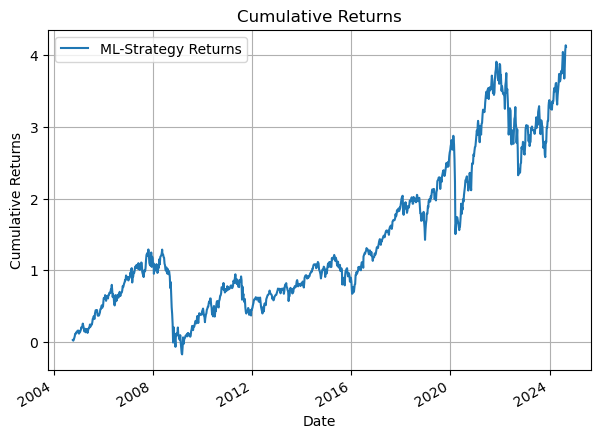

In [15]:
backtest.performance_summary()

In [16]:
display(backtest.predictions)
display(backtest.returns)

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,Asset 11
Date,,,,,,,,,,,
2004-10-11,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000
2004-10-18,0.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000
2004-10-25,0.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000
2004-11-01,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000
2004-11-08,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-05,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2024-08-12,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2024-08-19,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,Asset 11
Date,,,,,,,,,,,
2000-07-31,0.0152,0.0757,-0.0023,0.0009,0.0422,0.0050,0.0373,0.0021,-0.0025,-0.0084,-0.0318
2000-08-07,0.0679,0.0526,0.0159,0.0134,0.0365,-0.0237,-0.0196,-0.0116,0.0241,-0.0266,0.0346
2000-08-14,0.0157,0.0023,0.0152,0.0063,0.0171,0.0254,0.0294,0.0369,0.0085,0.0063,0.0481
2000-08-21,0.0095,0.0566,-0.0018,-0.0003,0.0068,-0.0264,0.0016,-0.0024,0.0077,0.0018,0.0384
2000-08-28,0.0184,0.0653,0.0019,0.0041,0.0379,-0.0353,0.0195,-0.0170,0.0019,-0.0095,0.0313
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12,0.0607,0.0718,-0.0440,-0.0147,0.0210,0.0425,0.0431,0.0882,0.0093,0.0503,0.0583
2024-08-19,0.1006,0.1346,0.0199,-0.0004,0.1037,0.0321,0.0931,0.0771,-0.0238,0.0239,-0.0377
2024-08-26,0.0020,-0.0266,0.0028,0.0064,0.0450,0.0540,0.0290,-0.0180,-0.0195,0.0097,0.0332


In [17]:
eval_rets = backtest.returns.loc[backtest.predictions.index]
equal_rets = (eval_rets * 1/len(eval_rets.columns)).sum(axis=1).to_frame('Equal Weight Portfolio Return')
equal_rets.describe()

,Equal Weight Portfolio Return
count,"1,039.0000"
mean,0.0027
std,0.0335
min,-0.2167
25%,-0.0118
50%,0.0035
75%,0.0188
max,0.2156


In [18]:
all_rets = pd.concat([equal_rets, backtest.strat_rets], axis=1)
calc_summary_statistics(all_rets, annual_factor=52, correlations=False, keep_columns=['Annualized Mean',
                                                                                      'Annualized Vol',
                                                                                      'Min',
                                                                                      'Max',
                                                                                      'Skewness',
                                                                                      'Excess Kurtosis',
                                                                                      'Historical VaR',
                                                                                      'Historical CVaR',
                                                                                      'Max Drawdown',
                                                                                      'Peak',
                                                                                      'Bottom',
                                                                                      'Recover',
                                                                                      'Duration (days)']).T

Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Equal Weight Portfolio Return,ML-Strategy Returns
Annualized Mean,0.1422,0.1094
Annualized Vol,0.2413,0.2336
Min,-0.2167,-0.2252
Max,0.2156,0.2156
Skewness,-0.1265,-0.4566
Excess Kurtosis,7.7660,7.9172
Historical VaR (5.00%),-0.0484,-0.0484
Annualized Historical VaR (5.00%),-0.3492,-0.3491
Historical CVaR (5.00%),-0.0781,-0.0783
Annualized Historical CVaR (5.00%),-0.5633,-0.5643


None

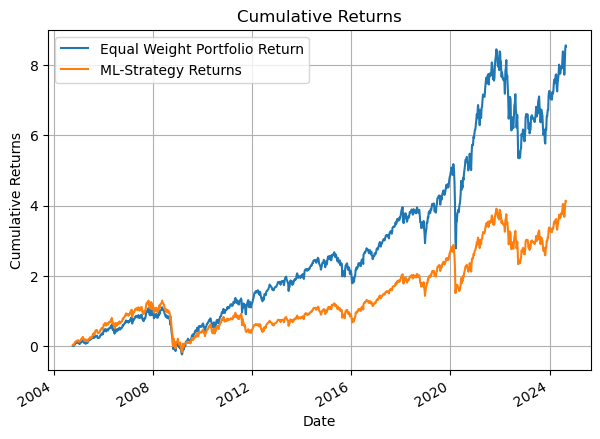

In [19]:
display(calc_cumulative_returns(all_rets))

In [ ]:
backtest.model._params_hist

AttributeError: 'Classifier' object has no attribute 'best_params_'

# Equity Domestic Universe

In [ ]:
UNIVERSE = 'equity_domestic'
ASSETS = ['Asset ' + str(i) for i in range(1, 47)]

def assets_file_str_func(universe, assets):
    asset_nums = [asset.split(' ',1)[1] for asset in assets]
    return [universe + f'_{num}_' + 'features' for num in asset_nums]

In [ ]:
eqd_backtest = Backtest(model=RandomForestClassifier(), base_per='2004-04-10', update_freq=6)

In [ ]:
eqd_backtest.read_returns(data_path=DATA_PATH, universe_returns='equity_domestic_monthly_rets')
eqd_backtest.compute_lookbacks(data_freq='monthly')
# backtest.read_features(data_path=CLASSIFIER_DATA_PATH, features=FEATURES)
eqd_backtest.read_data(data_path=DATA_PATH, assets=ASSETS, universe=UNIVERSE, file_str_func=assets_file_str_func)

In [ ]:
param_grid = {'pca__n_components': PCA_N_COMPONENTS_LIST,
              'classifier__n_estimators': N_ESTIMATORS_LIST, 
              'classifier__min_samples_split': MIN_SAMPLES_SPLIT_LIST, 
              'classifier__max_depth': MAX_DEPTH_LIST,
              'classifier__class_weight': CLASS_WEIGHT_LIST}
eqd_backtest.record_strat_rets(assets=ASSETS, param_grid=param_grid)

In [ ]:
eqd_backtest.strat_rets

,ML-Strategy Returns
Date,
2004-06-01,0.0079
2004-07-01,0.0330
2004-08-02,-0.0113
2004-09-01,0.0057
2004-10-01,0.0420
...,...
2024-04-01,0.0378
2024-05-01,-0.0478
2024-06-03,0.0396


,ML-Strategy Returns
Annualized Mean,0.1254
Annualized Vol,0.1706
Min,-0.2503
Max,0.1934
Skewness,-0.8264
Excess Kurtosis,4.1723
Historical VaR (5.00%),-0.0646
Annualized Historical VaR (5.00%),-0.2236
Historical CVaR (5.00%),-0.1096
Annualized Historical CVaR (5.00%),-0.3795


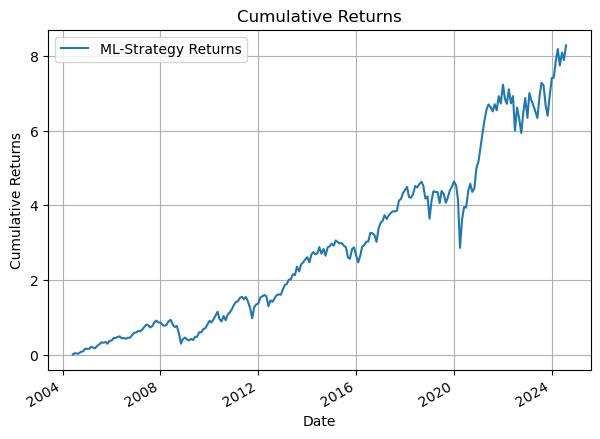

In [ ]:
eqd_backtest.performance_summary()

In [ ]:
display(eqd_backtest.predictions)
display(eqd_backtest.returns)

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,...,Asset 37,Asset 38,Asset 39,Asset 40,Asset 41,Asset 42,Asset 43,Asset 44,Asset 45,Asset 46
Date,,,,,,,,,,,,,,,,,,,,,
2004-06-01,NaN,NaN,NaN,1.0000,0,0,0,1.0000,0,0,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2004-07-01,NaN,NaN,NaN,1.0000,0,0,0,1.0000,0,0,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2004-08-02,NaN,NaN,NaN,1.0000,0,0,0,1.0000,0,0,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2004-09-01,NaN,NaN,NaN,1.0000,0,0,0,1.0000,0,0,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2004-10-01,NaN,NaN,NaN,1.0000,0,0,0,1.0000,0,0,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2024-05-01,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2024-06-03,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,...,Asset 37,Asset 38,Asset 39,Asset 40,Asset 41,Asset 42,Asset 43,Asset 44,Asset 45,Asset 46
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-03,0.0000,0.0000,0.0000,-0.0338,0.0000,0.0000,0.0000,-0.0137,0.0000,0.0000,...,0.0115,0.0419,0.0675,0.1113,0.0419,0.0177,-0.0411,-0.0118,-0.0171,-0.0013
2001-02-01,0.0000,0.0000,0.0000,-0.0378,0.0000,0.0000,0.0000,0.0048,0.0000,0.0000,...,0.0166,0.0215,-0.0046,0.0319,0.0253,-0.0520,-0.0496,0.0120,0.0114,0.0100
2001-03-01,0.0000,0.0000,0.0000,0.0269,0.0000,0.0000,0.0000,0.0441,0.0000,0.0000,...,-0.0172,0.0704,0.0395,-0.1746,0.0087,0.0011,0.0999,0.0110,0.0135,0.0058
2001-04-02,0.0000,0.0000,0.0000,-0.0210,0.0000,0.0000,0.0000,0.0367,0.0000,0.0000,...,-0.0038,-0.0238,-0.0028,-0.1542,-0.0019,-0.0201,0.0181,0.0008,-0.0176,0.0081
2001-05-01,0.0000,0.0000,0.0000,0.0414,0.0000,0.0000,0.0000,0.0314,0.0000,0.0000,...,0.0053,0.1430,0.0607,0.2815,0.0649,0.0244,0.0337,-0.0122,-0.0239,0.0032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,-0.0672,-0.0762,-0.0498,-0.0160,-0.0570,-0.0474,0.0096,-0.0149,-0.0978,-0.0203,...,-0.0728,-0.0724,-0.1059,-0.0831,-0.0480,-0.0287,0.0441,-0.0186,-0.0398,-0.0003
2024-06-03,0.0726,0.0105,0.0971,0.0548,0.0147,0.0757,0.0090,0.0565,-0.0070,-0.0625,...,0.0137,0.0037,0.0567,0.1348,0.0015,-0.0282,0.0741,0.0206,0.0378,0.0063
2024-07-01,-0.0249,-0.0829,-0.0115,0.0312,0.0068,0.0321,-0.0595,-0.0115,-0.1055,-0.0501,...,0.0166,0.0102,-0.0685,-0.0050,-0.0899,0.0122,-0.0617,-0.0019,-0.0153,0.0034


In [ ]:
eval_rets = eqd_backtest.returns.loc[eqd_backtest.predictions.index]
equal_rets = (eval_rets * 1/len(eval_rets.columns)).sum(axis=1).to_frame('Equal Weight Portfolio Return')
equal_rets.describe()

,Equal Weight Portfolio Return
count,243.0000
mean,0.0100
std,0.0539
min,-0.2503
25%,-0.0162
50%,0.0125
75%,0.0432
max,0.1934


In [ ]:
eqd_all_rets = pd.concat([equal_rets, eqd_backtest.strat_rets], axis=1)
calc_summary_statistics(eqd_all_rets, annual_factor=52, correlations=False, keep_columns=['Annualized Mean',
                                                                                      'Annualized Vol',
                                                                                      'Min',
                                                                                      'Max',
                                                                                      'Skewness',
                                                                                      'Excess Kurtosis',
                                                                                      'Historical VaR',
                                                                                      'Historical CVaR',
                                                                                      'Max Drawdown',
                                                                                      'Peak',
                                                                                      'Bottom',
                                                                                      'Recover',
                                                                                      'Duration (days)']).T

Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Equal Weight Portfolio Return,ML-Strategy Returns
Annualized Mean,0.5194,0.5436
Annualized Vol,0.3884,0.3551
Min,-0.2503,-0.2503
Max,0.1934,0.1934
Skewness,-0.5687,-0.8264
Excess Kurtosis,3.5385,4.1723
Historical VaR (5.00%),-0.0680,-0.0646
Annualized Historical VaR (5.00%),-0.4907,-0.4655
Historical CVaR (5.00%),-0.1241,-0.1096
Annualized Historical CVaR (5.00%),-0.8948,-0.7901


None

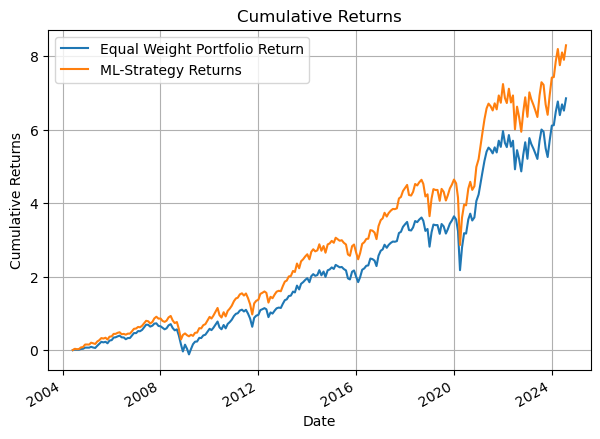

In [ ]:
display(calc_cumulative_returns(eqd_all_rets))

In [ ]:
eqd_backtest.model._params_hist

# Equity Global Universe

In [ ]:
UNIVERSE = 'equity_global'
ASSETS = ['Asset ' + str(i) for i in range(1, 47)]

def assets_file_str_func(universe, assets):
    asset_nums = [asset.split(' ',1)[1] for asset in assets]
    return [universe + f'_{num}_' + 'features' for num in asset_nums]

In [ ]:
eqg_backtest = Backtest(model=RandomForestClassifier(), base_per='2007-04-10', update_freq=6)

In [ ]:
eqg_backtest.read_returns(data_path=DATA_PATH, universe_returns='equity_global_monthly_rets')
eqg_backtest.compute_lookbacks(data_freq='monthly')
# backtest.read_features(data_path=CLASSIFIER_DATA_PATH, features=FEATURES)
eqg_backtest.read_data(data_path=DATA_PATH, assets=ASSETS, universe=UNIVERSE, file_str_func=assets_file_str_func)

In [ ]:
param_grid = {'pca__n_components': PCA_N_COMPONENTS_LIST,
              'classifier__n_estimators': N_ESTIMATORS_LIST, 
              'classifier__min_samples_split': MIN_SAMPLES_SPLIT_LIST, 
              'classifier__max_depth': MAX_DEPTH_LIST,
              'classifier__class_weight': CLASS_WEIGHT_LIST}
eqg_backtest.record_strat_rets(assets=ASSETS, param_grid=param_grid)

In [ ]:
eqg_backtest.strat_rets

,ML-Strategy Returns
Date,
2007-05-01,0.0372
2007-06-01,0.0607
2007-07-02,0.0316
2007-08-01,-0.0355
2007-09-04,0.0305
...,...
2022-12-01,0.1068
2023-01-03,-0.0246
2023-02-01,0.1264


,ML-Strategy Returns
Annualized Mean,0.1081
Annualized Vol,0.2056
Min,-0.2581
Max,0.1857
Skewness,-0.5382
Excess Kurtosis,2.6830
Historical VaR (5.00%),-0.0843
Annualized Historical VaR (5.00%),-0.2919
Historical CVaR (5.00%),-0.1358
Annualized Historical CVaR (5.00%),-0.4703


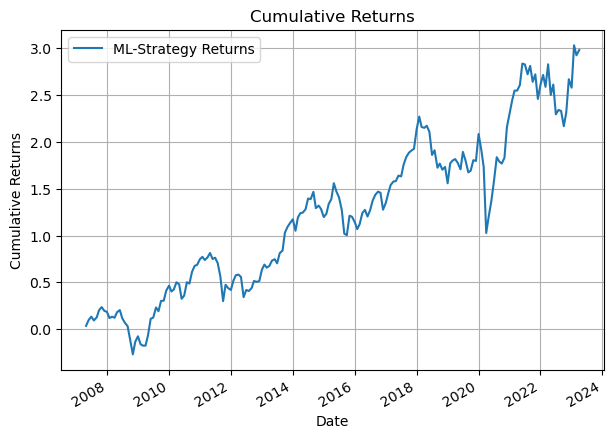

In [ ]:
eqg_backtest.performance_summary()

In [ ]:
display(eqg_backtest.predictions)
display(eqg_backtest.returns)

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,...,Asset 37,Asset 38,Asset 39,Asset 40,Asset 41,Asset 42,Asset 43,Asset 44,Asset 45,Asset 46
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-01,1.0000,1.0000,0,1.0000,0,0,1.0000,1.0000,0,0,...,0,0,0,0,0,0,0,0,0,1.0000
2007-06-01,1.0000,1.0000,0,1.0000,0,0,1.0000,1.0000,0,0,...,0,0,0,0,0,0,0,0,0,1.0000
2007-07-02,1.0000,1.0000,0,1.0000,0,0,1.0000,1.0000,0,0,...,0,0,0,0,0,0,0,0,0,1.0000
2007-08-01,1.0000,1.0000,0,1.0000,0,0,1.0000,1.0000,0,0,...,0,0,0,0,0,0,0,0,0,1.0000
2007-09-04,1.0000,1.0000,0,1.0000,0,0,1.0000,1.0000,0,0,...,0,0,0,0,0,0,0,0,0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2023-01-03,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2023-02-01,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,0,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000


,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,...,Asset 43,Asset 44,Asset 45,Asset 46,Asset 47,Asset 48,Asset 49,Asset 50,Asset 51,Asset 52
Date,,,,,,,,,,,,,,,,,,,,,
2003-04-14,0.0059,0.0035,0.0000,0.0069,0.0000,0.0000,0.0090,0.0042,0.0000,0.0000,...,0.0000,0.0000,0.0000,-0.0028,-0.0009,-0.0028,0.0000,0.0000,0.0207,0.0204
2003-05-01,0.1023,0.1299,0.0000,0.0811,0.0000,0.0000,0.0997,0.0606,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0328,0.0056,0.0169,0.0000,0.0000,0.0332,0.0638
2003-06-02,0.0422,0.3734,0.0000,0.1223,0.0000,0.0000,0.1478,0.2189,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0603,0.0047,0.0370,0.0000,0.0000,0.0593,0.0683
2003-07-01,0.1001,0.1734,0.0000,0.0544,0.0000,0.0000,0.0618,0.1381,0.0000,0.0000,...,0.0000,0.0000,0.0000,-0.0115,0.0035,-0.0025,0.0000,0.0000,0.0158,0.0260
2003-08-01,0.0754,0.1196,0.0000,-0.0382,0.0000,0.0000,0.0560,0.0665,0.0000,0.0000,...,0.0000,0.0000,0.0000,-0.0922,-0.0049,-0.0515,0.0000,0.0000,-0.0002,0.0366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03,-0.0917,0.0194,0.0177,-0.0209,-0.1047,-0.0451,-0.0171,-0.1395,-0.0683,-0.0274,...,-0.0355,0.1047,0.0044,-0.0383,-0.0001,-0.0179,0.0025,-0.0240,-0.0609,-0.0974
2023-02-01,0.2016,0.0573,0.1621,0.1527,0.2240,0.1977,0.0723,0.1461,0.1303,0.0929,...,0.0778,0.1146,0.0626,0.0690,0.0087,0.0352,0.0379,0.0501,0.0787,0.1378
2023-03-01,-0.0596,0.0690,0.0315,0.0111,0.0119,-0.0233,-0.0422,-0.0084,-0.0827,0.0155,...,-0.0085,-0.0294,-0.0526,-0.0699,-0.0116,-0.0473,-0.0412,-0.0571,-0.0391,-0.0323


In [ ]:
eval_rets = eqg_backtest.returns.loc[eqg_backtest.predictions.index]
equal_rets = (eval_rets * 1/len(eval_rets.columns)).sum(axis=1).to_frame('Equal Weight Portfolio Return')
equal_rets.describe()

,Equal Weight Portfolio Return
count,192.0000
mean,0.0074
std,0.0571
min,-0.2336
25%,-0.0242
50%,0.0106
75%,0.0383
max,0.1610


In [ ]:
eqg_all_rets = pd.concat([equal_rets, eqg_backtest.strat_rets], axis=1)
calc_summary_statistics(eqg_all_rets, annual_factor=52, correlations=False, keep_columns=['Annualized Mean',
                                                                                      'Annualized Vol',
                                                                                      'Min',
                                                                                      'Max',
                                                                                      'Skewness',
                                                                                      'Excess Kurtosis',
                                                                                      'Historical VaR',
                                                                                      'Historical CVaR',
                                                                                      'Max Drawdown',
                                                                                      'Peak',
                                                                                      'Bottom',
                                                                                      'Recover',
                                                                                      'Duration (days)']).T

Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Equal Weight Portfolio Return,ML-Strategy Returns
Annualized Mean,0.3866,0.4686
Annualized Vol,0.4118,0.4279
Min,-0.2336,-0.2581
Max,0.1610,0.1857
Skewness,-0.6043,-0.5382
Excess Kurtosis,2.2563,2.6830
Historical VaR (5.00%),-0.0881,-0.0843
Annualized Historical VaR (5.00%),-0.6355,-0.6076
Historical CVaR (5.00%),-0.1359,-0.1358
Annualized Historical CVaR (5.00%),-0.9797,-0.9791


None

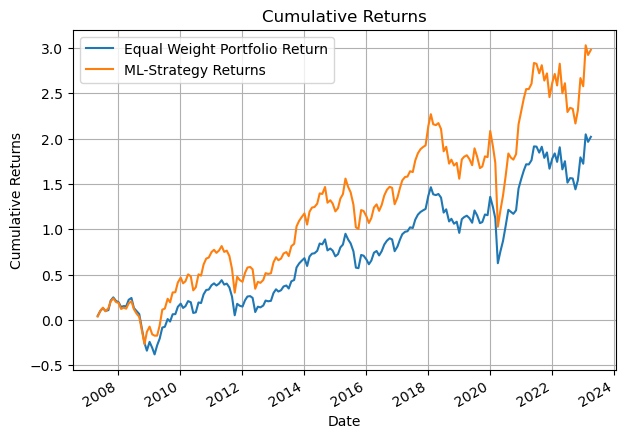

In [ ]:
display(calc_cumulative_returns(eqg_all_rets))

In [ ]:
eqg_backtest.model._params_hist